<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Посмотрим-на-различные-факотры-оттока" data-toc-modified-id="Посмотрим-на-различные-факотры-оттока-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим на различные факотры оттока</a></span><ul class="toc-item"><li><span><a href="#Избавимся-от-категориальных-признаков-методом-One-hot-encoder" data-toc-modified-id="Избавимся-от-категориальных-признаков-методом-One-hot-encoder-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Избавимся от категориальных признаков методом One hot encoder</a></span></li><li><span><a href="#Построим-модель-без-учета-баланса" data-toc-modified-id="Построим-модель-без-учета-баланса-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Построим модель без учета баланса</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Воспользуемся-функцией--Downsampling" data-toc-modified-id="Воспользуемся-функцией--Downsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Воспользуемся функцией  Downsampling</a></span></li><li><span><a href="#Воспользуемся-функцией-Upsampling" data-toc-modified-id="Воспользуемся-функцией-Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Воспользуемся функцией Upsampling</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Обучение-с-помощью-модели-Дерево-решения-после-балансирования-данных" data-toc-modified-id="Обучение-с-помощью-модели-Дерево-решения-после-балансирования-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обучение с помощью модели Дерево решения после балансирования данных</a></span></li></ul></li><li><span><a href="#ОБЩИЙ-ВЫВОД" data-toc-modified-id="ОБЩИЙ-ВЫВОД-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ОБЩИЙ ВЫВОД</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверим *F1*-меру на тестовой выборке

Дополнительно измерим *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/datasets/Churn.csv')

In [4]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**ПРИЗНАКИ**

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**ВЫВОДЫ ПО ДАННЫМ**

1. В данных присутствуют не нужные столбцы, от них предлагаю избавиться: 
 - rownumber
 - customerid
 - surname
2. Имеются пропуски в значении Tenure(сколько лет человек является клиентом банка). Моё предположение будет, что если данный момент пропущен, то человек будет являться совсем новым клиентом(не может же он являться клиентом банка n-ое количество лет и нигде эта информация не будет зафиксированна), отсюда предлагаю заполнить пропущенные знаения на 0.


In [6]:
# Удаляем ненужные столбцы 
exit_columns=['RowNumber','CustomerId','Surname']
data=data.drop(exit_columns,axis=1)

In [7]:
# Заполняем пропуски на 0
data['Tenure']=data['Tenure'].fillna(0).astype('int64')



In [8]:
#проверяем изменения 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Исследование задачи

Посмотрим на гитограмму оттока и осттатка клиентов 

<AxesSubplot:title={'center':'Соотношение оставшиееся/ушедшие'}>

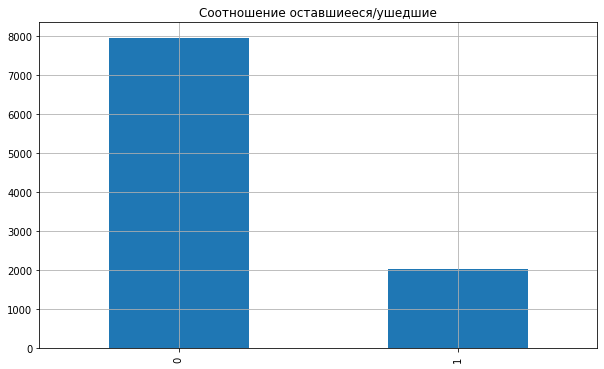

In [9]:
# Рисую гистограмму значений оттока и оставшихся клиентов
data['Exited'].value_counts().plot(kind='bar',grid=True,figsize=(10,6),title='Соотношение оставшиееся/ушедшие клиенты')

- Соотношение вышло 1 к 4. Значит у нас присутствует дисбаланс в данных.

### Посмотрим на различные факотры оттока 

1. Построим гистограмму для зависимости ухода от возраста


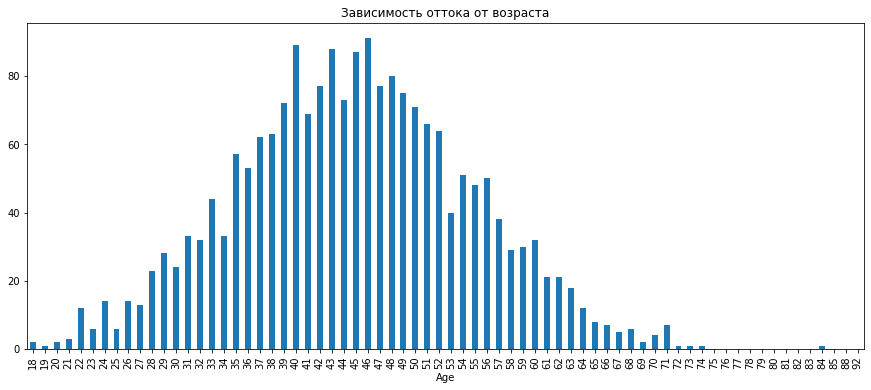

In [10]:
data.groupby('Age')['Exited'].sum().plot(figsize=(15,6),kind='bar',title='Зависимость оттока от возраста клиентов')
plt.show()


- Больше всего клиентов уходит в возрасте от 40 до 50 лет 

2. Построим гистограмму как зависит наличие недвижимости и отток 

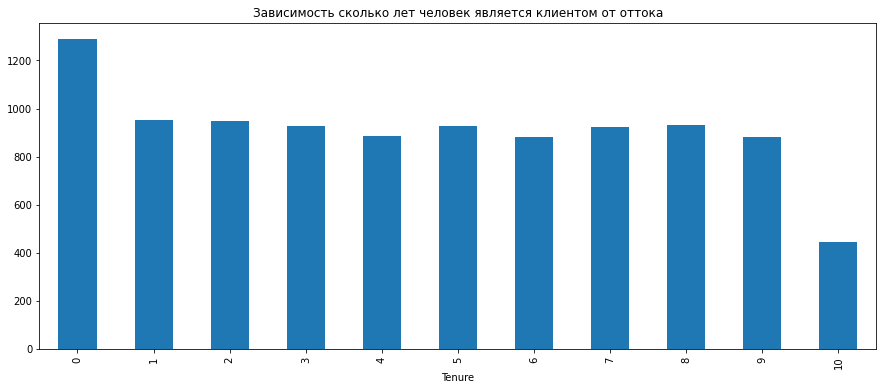

In [11]:
data.groupby('Tenure')['Exited'].count().plot(figsize=(15,6),kind='bar', title='Зависимость сколько лет человек является клиентом от оттока')
plt.show()

- Зависимость показывает, что люди являющимимися новыми клиентами уходят из банка чаще

3. Построим истогрмму медианного баланса денег оставшихся людей и ушедших

<AxesSubplot:title={'center':'Гистограмма медианного баланса денег оставшихся людей и ушедших'}, xlabel='Exited'>

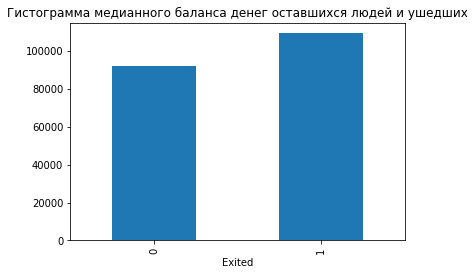

In [12]:
data.groupby('Exited')['Balance'].median().plot(kind='bar', title='Гистограмма медианного баланса денег оставшихся людей и ушедших')

Зависимость, опять же, не сильная. Но среднее значение баланса немного выше у тех, кто ушёл.

Посмотрим на корреляцию и сделаем выводы

In [13]:
data.corr() # Считаю корреляцию Пирсона

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.003087,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.007368,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.003087,-0.007368,1.000000,-0.005821,0.010106,0.021387,-0.025856,0.011225,-0.013319
Balance,0.006268,0.028308,-0.005821,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.010106,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.021387,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.025856,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.011225,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.013319,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [14]:
#pd.plotting.scatter_matrix(data, figsize=(15, 15), alpha=0.03)

Хммм...
Все признаки не сильно коррелируют с целевым признаком. Ладно, работаем дальше.

#### Избавимся от категориальных признаков методом One hot encoder

Используем метод get_dummies для избавления от категориальных признаков

In [15]:
data_ohe=pd.get_dummies(data,drop_first=True) 

In [16]:
target=data_ohe['Exited'] # Целевой признак
features=data_ohe.drop(['Exited'],axis=1) # Признаки


Разбиваем данные после OHE на четыре выборки train_features,valid_features,train_target,valid_target

In [17]:
#train_features,valid_features,train_target,valid_target=train_test_split(features,target,test_size=0.25,random_state=1234)
# Получение пропорции 60:40
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, 
                                                                              random_state=123456)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, 
                                                                              random_state=123456 )

Придётся стандартизировать тестовую и валидную выборки, так как есть маленькие и оочень большие значения.

In [18]:
numeric=['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

#### Построим модель без учета баланса

- Обучение с помощью модели Дерево решения

In [19]:
%%time

for depth in range(2, 30):
    model = DecisionTreeClassifier(random_state=123456, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('max depth', depth,'F1', f1_score(target_valid, predicted_valid))

max depth 2 F1 0.5078864353312303
max depth 3 F1 0.530232558139535
max depth 4 F1 0.49501661129568103
max depth 5 F1 0.5057851239669422
max depth 6 F1 0.5414201183431953
max depth 7 F1 0.5470332850940666
max depth 8 F1 0.5467625899280576
max depth 9 F1 0.5367847411444141
max depth 10 F1 0.5392953929539295
max depth 11 F1 0.5027624309392266
max depth 12 F1 0.47375504710632577
max depth 13 F1 0.47480106100795755
max depth 14 F1 0.472258064516129
max depth 15 F1 0.45914396887159536
max depth 16 F1 0.4685138539042821
max depth 17 F1 0.4796044499381953
max depth 18 F1 0.47144592952612396
max depth 19 F1 0.45925925925925926
max depth 20 F1 0.47515151515151516
max depth 21 F1 0.4684014869888476
max depth 22 F1 0.4684014869888476
max depth 23 F1 0.4684014869888476
max depth 24 F1 0.4684014869888476
max depth 25 F1 0.4684014869888476
max depth 26 F1 0.4684014869888476
max depth 27 F1 0.4684014869888476
max depth 28 F1 0.4684014869888476
max depth 29 F1 0.4684014869888476
CPU times: user 1.14 s,

Лучшее значение max_depth=7, при котором F1=0,547

- Обучение с помощью модели Случайный лес

In [20]:
%%time

for estimator in range(50, 300, 10):
    model =  RandomForestClassifier(random_state=123456, n_estimators=estimator)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('N estimators', estimator,'F1', f1_score(target_valid, predicted_valid))

N estimators 50 F1 0.5407066052227342
N estimators 60 F1 0.5423728813559322
N estimators 70 F1 0.5490797546012269
N estimators 80 F1 0.5423728813559322
N estimators 90 F1 0.5454545454545455
N estimators 100 F1 0.5443234836702955
N estimators 110 F1 0.5479876160990711
N estimators 120 F1 0.5502318392581144
N estimators 130 F1 0.5505443234836703
N estimators 140 F1 0.5356037151702787
N estimators 150 F1 0.5499231950844853
N estimators 160 F1 0.5462962962962963
N estimators 170 F1 0.5457364341085272
N estimators 180 F1 0.551617873651772
N estimators 190 F1 0.5499231950844853
N estimators 200 F1 0.5499231950844853
N estimators 210 F1 0.5565749235474007
N estimators 220 F1 0.551829268292683
N estimators 230 F1 0.551829268292683
N estimators 240 F1 0.5526717557251908
N estimators 250 F1 0.5570776255707763
N estimators 260 F1 0.5548780487804877
N estimators 270 F1 0.5526717557251908
N estimators 280 F1 0.5513016845329249
N estimators 290 F1 0.5490797546012269
CPU times: user 43.9 s, sys: 273 

Лучший результат был получен в районе 50-60 n_estimators. Сделаем исследование с шагом 1.

In [21]:
%%time

for estimator in range(40, 60, 1):
    model =  RandomForestClassifier(random_state=123456, n_estimators=estimator)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('N estimators', estimator,'F1', f1_score(target_valid, predicted_valid))


N estimators 40 F1 0.5507692307692308
N estimators 41 F1 0.5537065052950074
N estimators 42 F1 0.5490797546012269
N estimators 43 F1 0.5540334855403349
N estimators 44 F1 0.5468509984639016
N estimators 45 F1 0.5506807866868381
N estimators 46 F1 0.5398773006134968
N estimators 47 F1 0.5533834586466165
N estimators 48 F1 0.5465648854961832
N estimators 49 F1 0.5449010654490107
N estimators 50 F1 0.5407066052227342
N estimators 51 F1 0.5435114503816794
N estimators 52 F1 0.5415384615384615
N estimators 53 F1 0.5501519756838905
N estimators 54 F1 0.5460122699386504
N estimators 55 F1 0.5553869499241275
N estimators 56 F1 0.5440494590417312
N estimators 57 F1 0.551829268292683
N estimators 58 F1 0.5476923076923077
N estimators 59 F1 0.549618320610687
CPU times: user 10.2 s, sys: 31.9 ms, total: 10.2 s
Wall time: 10.4 s


учший результат по гиперпараметру n_estimators достигнут на 59.

- Обучение с помощью модели Логистической регрессии

In [22]:
%%time

model =  LogisticRegression(solver='liblinear', random_state=123456)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1', f1_score(target_valid, predicted_valid))

F1 0.08786610878661087
CPU times: user 116 ms, sys: 24.4 ms, total: 140 ms
Wall time: 91.7 ms


Результаты довольно низкие. Возможно precision или recall низкий и близок к 0.

Проведем оценку accuracy, precision и recall, также покажем F-метрику.

**ОБЩИЙ ВЫВОД**

Исходя из полученных данных лучшая модель оказалась - Дерево решеня при лучем значении max_depth=7, мы имеем F1 меру =0,586 на тестовой(валидной) выборке.

In [23]:
%%time

model = DecisionTreeClassifier(random_state=123456, max_depth=7)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Решающее дерево
Точность попадания по классам 0.8435
Precision 0.7
Recall 0.4489311163895487
F1 0.5470332850940666

CPU times: user 49.2 ms, sys: 19.3 ms, total: 68.5 ms
Wall time: 106 ms


In [24]:
%%time

model = RandomForestClassifier(random_state=123456, n_estimators=59)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()


Случайный лес
Точность попадания по классам 0.8525
Precision 0.7692307692307693
Recall 0.42755344418052255
F1 0.549618320610687

CPU times: user 614 ms, sys: 7 µs, total: 614 ms
Wall time: 626 ms


In [25]:
%%time

model = LogisticRegression(random_state=123456, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Логистическая регрессия
Точность попадания по классам 0.782
Precision 0.3684210526315789
Recall 0.0498812351543943
F1 0.08786610878661087

CPU times: user 87.9 ms, sys: 43.9 ms, total: 132 ms
Wall time: 75.4 ms


Проведем построение ROC-кривой для кажддой модели. И выведем показатель AUC-ROC.

AUC-ROC DecisionTreeClassifier 0.8126794823387122
AUC-ROC RandomForestClassifier 0.850836167693856
AUC-ROC LogisticRegression 0.6546492789116055


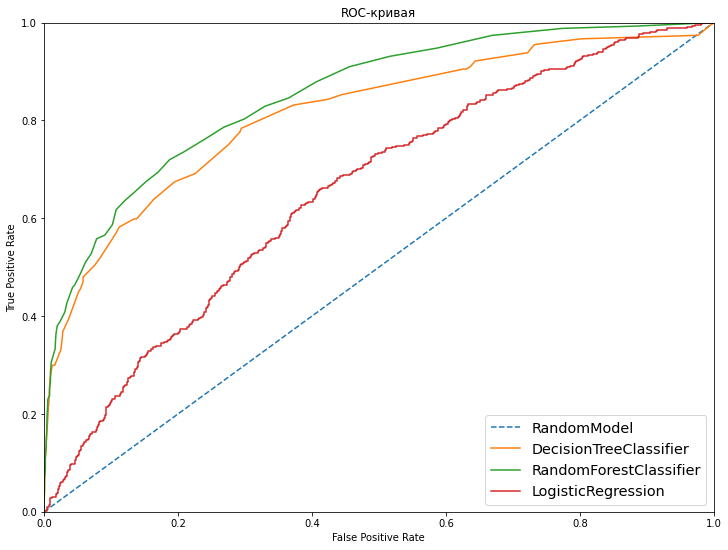

In [26]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


model = DecisionTreeClassifier(random_state=123456, max_depth=7)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(random_state=123456, n_estimators=59)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=123456, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

**ВЫВОД**

- Лучшие метрикии F1 и AUC-ROC  у Случайного леса

## Борьба с дисбалансом

Для борьбы с дисбалансом выполним сравнение моделей:

- С взвешенными классами
- С уменьшенной выборкой
- С увеличенной выборкой


In [27]:
%%time

model = DecisionTreeClassifier(random_state=123456, max_depth=7, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()


Решающее дерево
Точность попадания по классам 0.7615
Precision 0.4574468085106383
Recall 0.7149643705463183
F1 0.5579240037071361

CPU times: user 40.9 ms, sys: 100 µs, total: 41 ms
Wall time: 38.5 ms


In [28]:
%%time

model = RandomForestClassifier(random_state=123456, n_estimators=53, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()



Случайный лес
Точность попадания по классам 0.8495
Precision 0.7678571428571429
Recall 0.4085510688836104
F1 0.5333333333333333

CPU times: user 796 ms, sys: 3.97 ms, total: 800 ms
Wall time: 809 ms


In [29]:
%%time

model = LogisticRegression(random_state=123456, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Логистическая регрессия
Точность попадания по классам 0.658
Precision 0.3354192740926158
Recall 0.6365795724465558
F1 0.439344262295082

CPU times: user 72.6 ms, sys: 24.3 ms, total: 96.9 ms
Wall time: 97.5 ms


**ВЫВОД**
- F-мера падает у решающего дерева и случайного леса
- F-мера выросла в разы у логистической регресии

Исследуем способ уменьшения значений класса 0

### Воспользуемся функцией  Downsampling

In [30]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=123456)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=123456)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=123456)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(target_downsampled.value_counts())

1    1214
0    1196
Name: Exited, dtype: int64


In [31]:
%%time

model = DecisionTreeClassifier(random_state=123456, max_depth=7)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()




Решающее дерево
Точность попадания по классам 0.744
Precision 0.4379263301500682
Recall 0.7624703087885986
F1 0.5563258232235702

CPU times: user 15.3 ms, sys: 15.9 ms, total: 31.2 ms
Wall time: 26.9 ms


In [32]:
%%time


model = RandomForestClassifier(random_state=123456, n_estimators=53)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()



Случайный лес
Точность попадания по классам 0.7885
Precision 0.4984126984126984
Recall 0.7458432304038005
F1 0.5975261655566128

CPU times: user 286 ms, sys: 3.96 ms, total: 290 ms
Wall time: 323 ms


In [33]:
%%time


model = LogisticRegression(random_state=123456, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Логистическая регрессия
Точность попадания по классам 0.654
Precision 0.33575757575757575
Recall 0.6579572446555819
F1 0.44462279293739965

CPU times: user 70.8 ms, sys: 76.1 ms, total: 147 ms
Wall time: 104 ms


**ВЫВОД**

- Показатели логистической регрессии выросли
- Решающее дерево и случайный лес показали результат похуже

Исследуем методы увеличения класса 1

### Воспользуемся функцией Upsampling 

In [34]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(target_upsampled.value_counts())

1    4856
0    4786
Name: Exited, dtype: int64


In [35]:
%%time

model = DecisionTreeClassifier(random_state=123456, max_depth=7)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()




Решающее дерево
Точность попадания по классам 0.745
Precision 0.4392905866302865
Recall 0.7648456057007126
F1 0.5580589254766031

CPU times: user 73.1 ms, sys: 212 µs, total: 73.3 ms
Wall time: 94.1 ms


In [36]:
%%time

model = RandomForestClassifier(random_state=123456, n_estimators=53)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()



Случайный лес
Точность попадания по классам 0.839
Precision 0.6551724137931034
Recall 0.49643705463182897
F1 0.5648648648648649

CPU times: user 1.15 s, sys: 3.84 ms, total: 1.15 s
Wall time: 1.17 s


In [37]:
%%time

model = LogisticRegression(random_state=123456, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()


Логистическая регрессия
Точность попадания по классам 0.654
Precision 0.33414932680538556
Recall 0.6484560570071259
F1 0.44103392568659133

CPU times: user 104 ms, sys: 8.29 ms, total: 112 ms
Wall time: 97.4 ms


**ВЫВОД**
- F-мера стала лучше у случайного леса, логистической регресии по сравнению с дисбалансными данными
- Лучшей моделью по F-мера стал случайны лес с тренировочными данными, где увеличен класс 1.

Выведем ROC-кривую и AUC-ROC для посленнего измененного баланса.

AUC-ROC DecisionTreeClassifier 0.8109630708271719
AUC-ROC RandomForestClassifier 0.8483217226092464
AUC-ROC LogisticRegression 0.6975595667001124


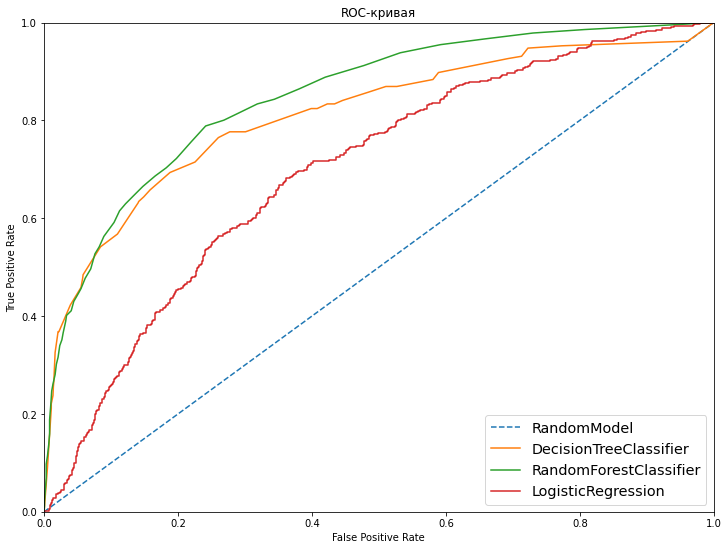

In [38]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


model = DecisionTreeClassifier(random_state=123456, max_depth=7)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(random_state=123456, n_estimators=53)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=123456, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

**ВЫВОД**

- Дисбаланс негативно повлиял на модели. Правильным решением стало увелечение классов на 1 в тренировочной выборке

## Тестирование модели

### Обучение с помощью модели Дерево решения после балансирования данных

К тестовой выборке примем модель случайного леса. Исследуем гиперпараметры и улучшим F-меру модели.

In [39]:
%%time

for estimator in range(10, 500, 10):
    model =  RandomForestClassifier(random_state=123456, n_estimators=estimator)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('N estimators', estimator,'F1', f1_score(target_valid, predicted_valid))

N estimators 10 F1 0.5119549929676512
N estimators 20 F1 0.5419532324621733
N estimators 30 F1 0.5544827586206896
N estimators 40 F1 0.5584594222833563
N estimators 50 F1 0.5604395604395604
N estimators 60 F1 0.5659863945578232
N estimators 70 F1 0.5593451568894953
N estimators 80 F1 0.5573770491803279
N estimators 90 F1 0.5541838134430728
N estimators 100 F1 0.5561643835616439
N estimators 110 F1 0.5581395348837209
N estimators 120 F1 0.5624142661179699
N estimators 130 F1 0.5667125171939478
N estimators 140 F1 0.5589041095890411
N estimators 150 F1 0.5624142661179699
N estimators 160 F1 0.5607734806629834
N estimators 170 F1 0.5580110497237569
N estimators 180 F1 0.5532503457814661
N estimators 190 F1 0.5572413793103448
N estimators 200 F1 0.5544827586206896
N estimators 210 F1 0.5544827586206896
N estimators 220 F1 0.5616438356164384
N estimators 230 F1 0.5631868131868132
N estimators 240 F1 0.5584594222833563
N estimators 250 F1 0.5619834710743802
N estimators 260 F1 0.560773480662

Лучший результат лежит в диапазоне 370-400.

In [40]:
%%time

for estimator in range(370, 400):
    model =  RandomForestClassifier(random_state=1223456, n_estimators=estimator)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('N estimators', estimator,'F1', f1_score(target_valid, predicted_valid))

N estimators 370 F1 0.5698478561549102
N estimators 371 F1 0.5718232044198895
N estimators 372 F1 0.5678670360110804
N estimators 373 F1 0.5702479338842974
N estimators 374 F1 0.569060773480663
N estimators 375 F1 0.5667125171939478
N estimators 376 F1 0.5682758620689656
N estimators 377 F1 0.5714285714285714
N estimators 378 F1 0.569060773480663
N estimators 379 F1 0.5694635488308116
N estimators 380 F1 0.569060773480663
N estimators 381 F1 0.5694635488308116
N estimators 382 F1 0.5694635488308116
N estimators 383 F1 0.5679012345679012
N estimators 384 F1 0.5655172413793104
N estimators 385 F1 0.5667125171939478
N estimators 386 F1 0.5627586206896551
N estimators 387 F1 0.5639614855570839
N estimators 388 F1 0.5627586206896551
N estimators 389 F1 0.5647382920110193
N estimators 390 F1 0.561549100968188
N estimators 391 F1 0.5627586206896551
N estimators 392 F1 0.56353591160221
N estimators 393 F1 0.5647382920110193
N estimators 394 F1 0.5655172413793104
N estimators 395 F1 0.564738292

In [41]:
%%time

model =  RandomForestClassifier(random_state=123456, n_estimators=371, criterion='entropy')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('F1', f1_score(target_valid, predicted_valid))

F1 0.5834464043419267
CPU times: user 6.71 s, sys: 12 ms, total: 6.72 s
Wall time: 6.74 s


Изменим гиперпараметр min_samples_split.

In [42]:
%%time

for samples_split in range(1, 11):
    model =  RandomForestClassifier(random_state=123456, n_estimators=estimator, min_samples_split=samples_split/10)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('Samples_split', samples_split/10,'F1', f1_score(target_valid, predicted_valid))
    
for samples_split in range(2, 11):
    model =  RandomForestClassifier(random_state=123456, n_estimators=estimator, min_samples_split=samples_split)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('Samples_split', samples_split,'F1', f1_score(target_valid, predicted_valid))

Samples_split 0.1 F1 0.5996168582375481
Samples_split 0.2 F1 0.5845004668534081
Samples_split 0.3 F1 0.5666666666666667
Samples_split 0.4 F1 0.5608465608465608
Samples_split 0.5 F1 0.5657298277425203
Samples_split 0.6 F1 0.546594982078853
Samples_split 0.7 F1 0.34779016935150764
Samples_split 0.8 F1 0.34779016935150764
Samples_split 0.9 F1 0.34779016935150764
Samples_split 1.0 F1 0.34779016935150764
Samples_split 2 F1 0.5627586206896551
Samples_split 3 F1 0.5710344827586208
Samples_split 4 F1 0.572987721691678
Samples_split 5 F1 0.5760430686406461
Samples_split 6 F1 0.5824468085106383
Samples_split 7 F1 0.5921052631578947
Samples_split 8 F1 0.5961290322580646
Samples_split 9 F1 0.6045918367346939
Samples_split 10 F1 0.6040100250626567
CPU times: user 1min 7s, sys: 176 ms, total: 1min 7s
Wall time: 1min 8s


Лучший F1 получени при min_samples_split=9.

Изменим гиперпараметр min_samples_leaf.



In [43]:
%%time

for samples_leaf in range(1, 6):
    model =  RandomForestClassifier(random_state=123456, n_estimators=estimator, min_samples_split=9, 
                                    min_samples_leaf= samples_leaf/10)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('Samples_leaf', samples_leaf/10,'F1', f1_score(target_valid, predicted_valid))

Samples_leaf 0.1 F1 0.5467889908256881
Samples_leaf 0.2 F1 0.5322580645161291
Samples_leaf 0.3 F1 0.48449287510477795
Samples_leaf 0.4 F1 0.34779016935150764
Samples_leaf 0.5 F1 0.34779016935150764
CPU times: user 7.51 s, sys: 52 ms, total: 7.56 s
Wall time: 7.69 s


In [44]:
%%time

    
for samples_leaf in range(1, 11):
    model =  RandomForestClassifier(random_state=123456, n_estimators=estimator, min_samples_split=9,
                                   min_samples_leaf= samples_leaf)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('Samples_leaf', samples_leaf,'F1', f1_score(target_valid, predicted_valid))

Samples_leaf 1 F1 0.6045918367346939
Samples_leaf 2 F1 0.6049382716049383
Samples_leaf 3 F1 0.6157517899761338
Samples_leaf 4 F1 0.6137689614935822
Samples_leaf 5 F1 0.6220204313280364
Samples_leaf 6 F1 0.6261261261261262
Samples_leaf 7 F1 0.6283185840707964
Samples_leaf 8 F1 0.625
Samples_leaf 9 F1 0.6282608695652173
Samples_leaf 10 F1 0.6394849785407726
CPU times: user 52.2 s, sys: 87.8 ms, total: 52.3 s
Wall time: 53.2 s


Лучший показатель min_samples_leaf = 10

Проверим на тестовой выборке четыре модели: на дисбалансных данных и сбалансированных: со взвешенными классами, усечением 0 класса и расширением класса 1.

In [45]:
model = RandomForestClassifier(random_state=123456, n_estimators=estimator, min_samples_split=5,
                                   min_samples_leaf=10)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Случайный лес - дисбаланс классов')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

Случайный лес - дисбаланс классов
Точность попадания по классам 0.86
Precision 0.7877358490566038
Recall 0.4154228855721393
F1 0.5439739413680782



In [46]:
model = RandomForestClassifier(random_state=123456, n_estimators=estimator, min_samples_split=5,
                                   min_samples_leaf=10, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Случайный лес - взвешенные классы')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

Случайный лес - взвешенные классы
Точность попадания по классам 0.831
Precision 0.5686695278969958
Recall 0.6592039800995025
F1 0.6105990783410139



In [47]:
model = RandomForestClassifier(random_state=123456, n_estimators=estimator, min_samples_split=5,
                                   min_samples_leaf=10)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
print('Случайный лес - уменьшенное количество классов 0')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()


Случайный лес - уменьшенное количество классов 0
Точность попадания по классам 0.787
Precision 0.4805194805194805
Recall 0.736318407960199
F1 0.581532416502947



In [48]:
model = RandomForestClassifier(random_state=123456, n_estimators=estimator, min_samples_split=5,
                                   min_samples_leaf=10)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print('Случайный лес - увеличенное количество классов 1')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

Случайный лес - увеличенное количество классов 1
Точность попадания по классам 0.82
Precision 0.5418326693227091
Recall 0.6766169154228856
F1 0.6017699115044247



AUC-ROC RandomForestClassifier - disbalanced 0.8572718385544119
AUC-ROC RandomForestClassifier - balanced by class weight 0.8563534019514443
AUC-ROC RandomForestClassifier - balanced by reduce 0 class 0.8554910055479797
AUC-ROC RandomForestClassifier - balanced by grow 1 class 0.8547438028879382


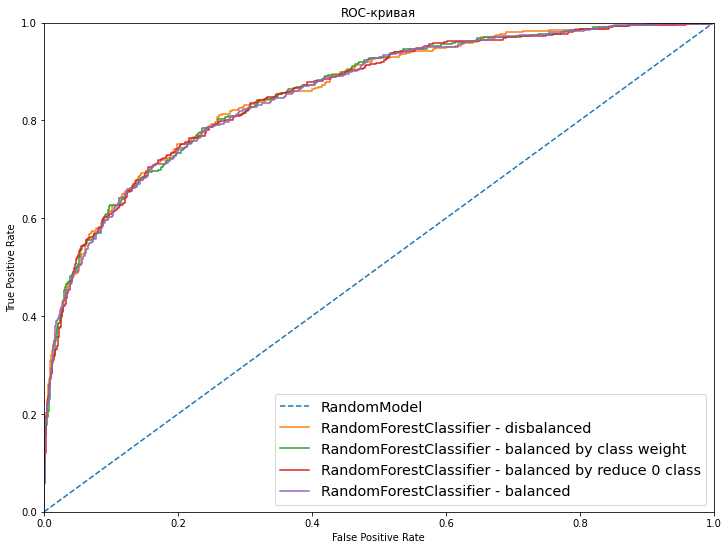

In [49]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


model = RandomForestClassifier(random_state=123456, n_estimators=estimator, min_samples_split=5,
                                   min_samples_leaf=7)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - disbalanced',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - disbalanced')

model = RandomForestClassifier(random_state=123456, n_estimators=estimator, min_samples_split=5,
                                   min_samples_leaf=7, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - balanced by class weight',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - balanced by class weight')

model = RandomForestClassifier(random_state=123456, n_estimators=estimator, min_samples_split=5,
                                   min_samples_leaf=7)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - balanced by reduce 0 class',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - balanced by reduce 0 class')

model = RandomForestClassifier(random_state=123456, n_estimators=estimator, min_samples_split=5,
                                   min_samples_leaf=7)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - balanced by grow 1 class',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - balanced')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

## ОБЩИЙ ВЫВОД

В проекте мы выполнили:

- Изучили данные, разбили на три выборки 
- Проверили модели на данных без изменений
- Скорректировали баланс класса
- Провели поиск гиперпараметров
- Нашли наилучшую модель. Лучшей моделю будет модель Случайного леса со взвешенными классами при значениях AUC-ROC = 0.856 и F1 мерой = 0.610